<a href="https://colab.research.google.com/github/pablex72/vi-phenology-analysis-/blob/main/stages_with_1st_derivate_and_maximums_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heading Point: 2022-01-10 00:00:00
Tillering Point: 2021-12-01 00:00:00
Maturity Point: 2022-01-30 00:00:00
NDVI value for Heading Point: 0.734993073
NDVI value for Tillering Point: 0.410792869
NDVI value for Maturity Point: 0.60077173


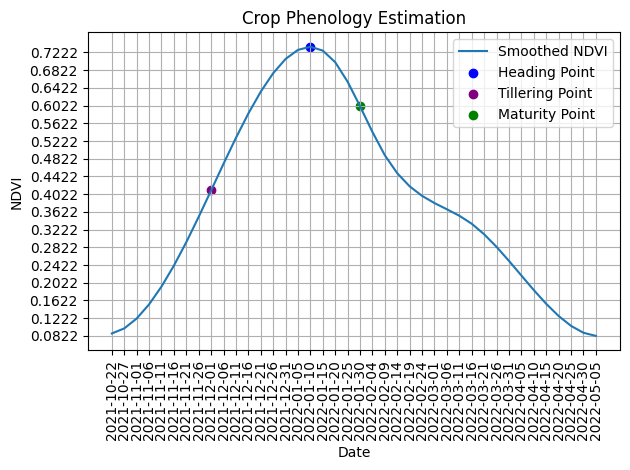

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Read data from CSV file
df = pd.read_csv('/content/one_season_farm3.csv')

# Parse date and NDVI values
dates = pd.to_datetime(df['Date'])
ndvi_values = df['NDVI'].values

smoothed_ndvi = ndvi_values
# Compute first and second order derivatives
first_derivative = np.gradient(smoothed_ndvi)

# Identify heading point as the date with the maximum NDVI
heading_point = np.argmax(smoothed_ndvi)

# Identify tillering point as the date with the maximum value of the first derivative
tillering_point = np.argmax(first_derivative)

# Identify maturity point as the date with the minimum value of the first derivative
maturity_point = np.argmin(first_derivative)

# Print dates without "Name: Date, dtype: datetime64[ns]"
print("Heading Point:", str(dates[heading_point]))
print("Tillering Point:", str(dates[tillering_point]))
print("Maturity Point:", str(dates[maturity_point]))

# Print NDVI values for heading, tillering, and maturity points
print("NDVI value for Heading Point:", smoothed_ndvi[heading_point])
print("NDVI value for Tillering Point:", smoothed_ndvi[tillering_point])
print("NDVI value for Maturity Point:", smoothed_ndvi[maturity_point])

# Plot the smoothed NDVI and identified phenology points
plt.plot(dates, smoothed_ndvi, label='Smoothed NDVI')
plt.scatter(dates[heading_point], smoothed_ndvi[heading_point], color='blue', label='Heading Point', marker='o')
plt.scatter(dates[tillering_point], smoothed_ndvi[tillering_point], color='purple', label='Tillering Point', marker='o')
plt.scatter(dates[maturity_point], smoothed_ndvi[maturity_point], color='green', label='Maturity Point', marker='o')

# Set x-axis and y-axis ticks and labels for better granularity
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='5D'), rotation=90)
plt.yticks(np.arange(min(smoothed_ndvi), max(smoothed_ndvi), step=0.04))

plt.title('Crop Phenology Estimation')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
